In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('./Data_reg/Position_Salaries.csv')
print(df) 
df.info()

            Position  Level   Salary
0   Project Analyste      1    45000
1          Ingenieur      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5         Gouverneur      6   150000
6          Associate      7   200000
7         Commercial      8   300000
8            C-level      9   500000
9                PDG     10  1000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
df.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
# Déterminer les corrélations les plus fortes
df.corrwith(df['Salary'], method = 'pearson').sort_values(ascending = False)

Salary    1.000000
Level     0.817949
dtype: float64

In [5]:
x=df[['Level']]
y=np.array(df[['Salary']])
y.shape

(10, 1)

In [6]:
#matrice X
X=np.hstack((x**2,x,np.ones(x.shape)))
X.shape

(10, 3)

# Theta

In [7]:
#initialisation de theta
theta=np.random.randn(3,1)
theta

array([[ 1.13255124],
       [ 0.79043581],
       [-0.14677756]])

## Modèle


In [8]:
def model(x,theta):
    return X.dot(theta)

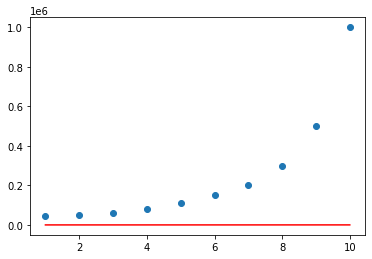

In [9]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), color='r')

## Fonction coût

In [10]:
#Fonction Cout 

def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
cost_fonction(X,y,theta)

71434322783.13353

# Gradient et descente de gradient


In [12]:
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

 ## Theta Final 
 

In [14]:

n_iterations= 30                                                                                                                
learning_rate =0.0001
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)



In [15]:
theta_final

array([[7025.86863832],
       [ 515.96550568],
       [  34.11995198]])

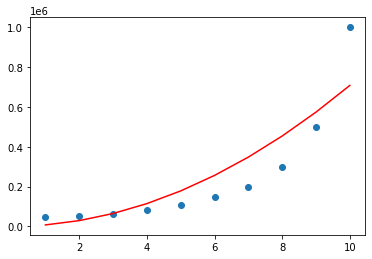

In [16]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

# Courbe d'apprentissage 

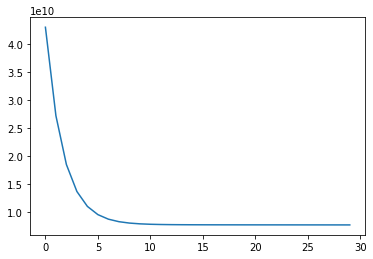

In [17]:
plt.plot(range(n_iterations),cost_history)

In [18]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 

In [19]:
coef_determination(y,predictions)

0.8074315569362831